In [6]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from contextlib import redirect_stdout
import matplotlib.patches as patches

In [7]:
df_t = pd.read_csv('database/Tabla_DOBLE_T.csv',sep=';')
df_t = df_t.copy()

In [8]:
df_u = pd.read_csv('database/Tabla_CANAL.csv',sep = ",")
df_u = df_u.copy()

In [9]:
# Columnas a numerico
columnas_numerico = df_t.columns[2:]
columnas_numerico2 = df_u.columns[2:]

# Apply pd.to_numeric to the selected columns
df_t[columnas_numerico] = df_t[columnas_numerico].apply(pd.to_numeric, errors='coerce')
df_u[columnas_numerico2] = df_u[columnas_numerico2].apply(pd.to_numeric, errors='coerce')



In [10]:
df_t

,Tipo,Designacion,d,bf,tf,hw,tw=r1,r2,bf/2tf,hw/tw,...,Zy,w1,d1,w4,t1,w3,J,Cw,X1,X2
0,IPN,80,80.0,42.0,5.9,59.0,3.9,2.3,3.6,15.1,...,4.90,22.0,6.4,10.0,4.4,NaN,0.700,87.5,32815.0,0.70
1,IPN,100,100.0,50.0,6.8,75.0,4.5,2.7,3.7,16.7,...,8.00,28.0,6.4,11.0,5.1,NaN,1.300,268.0,30082.0,1.00
2,IPN,120,120.0,58.0,7.7,92.0,5.1,3.1,3.8,18.0,...,12.20,32.0,8.4,13.0,5.7,NaN,2.200,685.0,28382.0,1.30
3,IPN,140,140.0,66.0,8.6,109.0,5.7,3.4,3.8,19.1,...,17.70,34.0,11.0,16.0,6.3,NaN,3.600,1540.0,27117.0,1.60
4,IPN,160,160.0,74.0,9.5,125.0,6.3,3.8,3.9,19.8,...,24.60,40.0,11.0,17.0,6.9,NaN,5.400,3138.0,26190.0,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,M,12x10.8,301.0,78.0,5.2,276.0,4.1,NaN,7.4,67.1,...,17.20,NaN,NaN,NaN,NaN,NaN,1.665,8405.0,9101.0,1595.00
394,M,10x9,250.0,68.0,5.2,225.0,4.0,NaN,6.5,56.5,...,13.40,NaN,NaN,NaN,NaN,NaN,1.249,3921.0,10825.0,780.00
395,M,10x8,249.0,68.0,4.7,224.0,3.5,NaN,7.4,63.4,...,11.80,NaN,NaN,NaN,NaN,NaN,0.832,3437.0,9653.0,1216.00
396,M,"8x6,5",199.0,58.0,4.7,175.0,3.4,NaN,6.1,51.7,...,8.64,NaN,NaN,NaN,NaN,NaN,0.832,1404.0,12273.0,435.00


In [11]:
df_u

,Tipo,Designacion,d,bf,tf,hw,tw,r2,bf/tf,hw/tw,...,w1,d1,w4,t1,t2,J,Cw,X1,X2,xp
0,UPN,30x15,30.0,15.0,4.50,12.0,4.0,2.0,3.33,3.0,...,10.0,6.4,5.0,3.90,5.10,0.14,NaN,NaN,NaN,NaN
1,UPN,30,30.0,33.0,7.00,1.0,5.0,3.5,4.71,0.2,...,18.0,8.4,15.0,5.68,8.32,0.82,NaN,NaN,NaN,NaN
2,UPN,40x20,40.0,20.0,5.50,18.0,5.0,2.5,3.64,3.6,...,11.0,6.4,9.0,4.70,6.30,0.34,NaN,NaN,NaN,NaN
3,UPN,40,40.0,35.0,7.00,11.0,5.0,3.5,5.00,2.2,...,18.0,11.0,17.0,5.60,8.40,0.91,NaN,NaN,NaN,NaN
4,UPN,50x25,50.0,25.0,6.00,25.0,5.0,3.0,4.17,5.0,...,16.0,8.4,9.0,5.00,7.00,0.52,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,MC,"7x19,1",178.0,87.7,12.70,121.0,8941.0,NaN,3.45,13.5,...,NaN,NaN,NaN,NaN,NaN,17.10,13266.0,34035.0,0.49,1.44
81,MC,6x18,152.0,89.0,12.07,98.4,9627.0,NaN,3.69,10.2,...,NaN,NaN,NaN,NaN,NaN,15.80,9291.0,39492.0,0.27,1.58
82,MC,"6x16,3",152.0,76.2,12.07,98.4,9525.0,NaN,3.16,10.3,...,NaN,NaN,NaN,NaN,NaN,14.20,5935.0,40583.0,0.25,1.18
83,MC,"6x15,1",152.0,74.7,12.07,98.4,8026.0,NaN,3.10,12.3,...,NaN,NaN,NaN,NaN,NaN,12.10,5532.0,37647.0,0.32,1.36


Propiedades Acero

In [12]:
E = 200000 #MPa
Fy = 243 #MPA
G = 77200 # MPa
Fr = 69 #MPA (Tensión residual. Reemplazar por 114 para secciones soldadas)

Perfiles disponibles

In [21]:
# Creación de clases

class dobleT:
    def __init__(self, familia, designacion):
        #Asigno propiedades de tabla
        self.data = df_t
        self.data = self.data[(self.data['Tipo'] == familia) & (self.data['Designacion'] == designacion)]
        self.name = self.data.iloc[0]['Tipo'] + self.data.iloc[0]['Designacion']
        self.d = self.data.iloc[0]['d']
        self.bf = self.data.iloc[0]['bf']
        self.tf = self.data.iloc[0]['tf']
        self.hw = self.data.iloc[0]['hw']
        self.tw = self.data.iloc[0]['tw=r1']
        self.r2 = self.data.iloc[0]['r2']
        self.bf_2tf = self.data.iloc[0]['bf/2tf']
        self.hw_tw = self.data.iloc[0]['hw/tw']
        self.Ag = self.data.iloc[0]['Ag']
        self.Peso = self.data.iloc[0]['Peso']
        self.Ix = self.data.iloc[0]['Ix']
        self.Sx = self.data.iloc[0]['Sx']
        self.rx = self.data.iloc[0]['rx']
        self.Qx = self.data.iloc[0]['Qx']
        self.Zx = self.data.iloc[0]['Zx']
        self.Iy = self.data.iloc[0]['Iy']
        self.Sy = self.data.iloc[0]['Sy']
        self.ry = self.data.iloc[0]['ry']
        self.Qy = self.data.iloc[0]['Qy']
        self._1_5Sy = self.data.iloc[0]['1.5Sy']
        self.Zy = self.data.iloc[0]['Zy']
        self.w1 = self.data.iloc[0]['w1']
        self.d1 = self.data.iloc[0]['d1']
        self.w4 = self.data.iloc[0]['w4']
        self.t1 = self.data.iloc[0]['t1']
        self.w3 = self.data.iloc[0]['w3']
        self.J = self.data.iloc[0]['J']
        self.Cw = self.data.iloc[0]['Cw']
        self.X1 = self.data.iloc[0]['X1']
        self.X2 = self.data.iloc[0]['X2']*10**-5
        
    def propiedades(self):
        #Tabla con propiedades del perfil y unidades
        properties = [
        ["d", f"{self.d} mm"],
        ["bf", f"{self.bf} mm"],
        ["tf", f"{self.tf} mm"],
        ["hw", f"{self.hw} mm"],
        ["tw=r1", f"{self.tw} mm"],
        ["r2", f"{self.r2} mm"],
        ["bf/2tf", f"{self.bf_2tf}"],
        ["hw/tw", f"{self.hw_tw}"],
        ["Ag", f"{self.Ag} cm2"],
        ["Peso", f"{self.Peso} kg/m"],
        ["Ix", f"{self.Ix} cm4"],
        ["Sx", f"{self.Sx} cm3"],
        ["rx", f"{self.rx} cm"],
        ["Qx", f"{self.Qx} cm3"],
        ["Zx", f"{self.Zx} cm3"],
        ["Iy", f"{self.Iy} cm4"],
        ["Sy", f"{self.Sy} cm3"],
        ["ry", f"{self.ry} cm"],
        ["Qy", f"{self.Qy} cm3"],
        ["1.5Sy", f"{self._1_5Sy} cm3"],
        ["Zy", f"{self.Zy} cm3"],
        ["w1", f"{self.w1} mm"],
        ["d1", f"{self.d1} mm"],
        ["w4", f"{self.w4} mm"],
        ["t1", f"{self.t1} mm"],
        ["w3", f"{self.w3} mm"],
        ["J", f"{self.J} cm4"],
        ["Cw", f"{self.Cw} cm6"],
        ["X1", f"{self.X1} MPa"],
        ["X2", f"{self.X2} MPA^-2 * 10^5"]
    ]

        table = PrettyTable(["Propiedad", "Valor"])
        table.align = "l"
        table.add_rows(properties)
        
        print(table)
    
    def deformacion_tipica(self,caso,carga,largo,tolerancia,eje):
        #carga en kN o kN/m
        #Largo en cm
        #Deflexion en mm

        if eje == 'fuerte':
            inercia = self.Ix
        elif eje == 'debil':
            inercia = self.Iy
        else:
            return print('Error en entrada de sentido de aplicacion de carga')

        casos = ['Simplemente apoyado, carga centrada', 
                 'Simplemente apoyado, carga uniforme', 'Voladizo, carga extremo','Voladizo, carga uniforme',
                   'Empotrado-Empotrado, carga centrada','Empotrado-Empotrado, carga uniforme']
        if caso == 'Simplemente apoyado, carga centrada':
            deflexion = carga*largo**3/(48*E*inercia) * 100
        elif caso == 'Simplemente apoyado, carga uniforme':
            deflexion = 5* carga *largo**4/(384*E*inercia) * 100
        elif caso == 'Voladizo, carga extremo':
            deflexion = carga * largo **3 / (3*E*inercia) * 100
        elif caso == 'Voladizo, carga uniforme':
            deflexion = carga * largo ** 4 / (8*E*inercia) * 100
        elif caso == 'Empotrado-Empotrado, carga centrada':
            deflexion = carga * largo ** 3 /(192 * E * inercia) * 100
        elif caso == 'Empotrado-Empotrado, carga uniforme':
            deflexion = carga * largo ** 4 / (384 * E * inercia) * 100
        else:  
            return print('Error en el ingreso de la carga')
        
        def_admisible = (largo*10/tolerancia)
        ratio = round(deflexion / (def_admisible) * 100,2)


        string = f"""\
            Deflexión para LC y perfil dado: {deflexion:.2f} mm
            Deflexión admisible: {def_admisible:.2f} mm
            Ratio para tolerancia dada: {ratio:.2f} %
            """

        return print(string),deflexion

    
    def axil(self,kx,lx,ky,ly,kz,lz): # longitudes en cm
        phi_c = 0.85
        #Análisis para secciones compactas. Se debe obtener Pn que será el menor valor de pandeo flexional y pandeo torsional (secciones doblemente simétricas)
        esbeltez_x = kx * lx / self.rx
        esbeltez_y = ky * ly / self.ry
        factor_modificada = 1 / math.pi * (Fy/E) **(1/2)
        esbeltex_x_modificada = factor_modificada * esbeltez_x
        esbeltex_y_modificada = factor_modificada * esbeltez_y
        
        fe_x = math.pi**2 * E/(kx*lx/self.rx)
        fe_y = math.pi**2 * E/(ky*ly/self.ry)
        
        #Pandeo torsional
        # Se calculo la tensión crítica elástica de pandeo torsional
        
        f_e = 1/(self.Ix+self.Iy)*((math.pi**2) * E * self.Cw/((kz*lz)**2)+G*self.J)
        esbeltez_reducida = (Fy/f_e)**(1/2)
        
        #Pandeo flexional
        ## X
        if esbeltex_x_modificada <= 1.5:
            fcr_x = (0.658 ** esbeltex_x_modificada**2)*Fy
        else:
            fcr_x = 0.877 * Fy / esbeltex_x_modificada**2
        ## Y
        if esbeltex_y_modificada <= 1.5:
            fcr_y = (0.658 ** esbeltex_y_modificada**2)*Fy
        else:
            fcr_y = 0.877 * Fy / esbeltex_y_modificada**2
        # Z
        if esbeltez_reducida <= 1.5:
            fcr_z = (0.658 ** esbeltez_reducida**2)*Fy
        else:
            fcr_z = 0.877 * Fy / esbeltez_reducida**2
            
    
        # Rige la mínima tensión crítica
        fcr = min(fcr_x,fcr_y,fcr_z)
        pn = fcr * self.Ag *10**-1 #kN
        pd = pn * phi_c
        
        if max(esbeltez_x,esbeltez_y) > 200:
            string = f"""\
        Las esbelteces según el eje fuerte y débil son: ({esbeltez_x:.2f};{esbeltez_y:.2f})
        No verifica esbeltez límite de 200 para compresión
        """
        else:
            
            string = f"""\
            Las esbelteces según el eje fuerte y débil son: ({esbeltez_x:.2f};{esbeltez_y:.2f})
            Tensiones críticas de pandeo para cada eje son: ({fcr_x:.2f};{fcr_y:.2f};{fcr_z:.2f}) MPa
            Resistencia de diseño =  {phi_c:.2f} * {pn:.2f} = {pd:.2f} kN
            """
        
        return round(pd,2),print(string)
    
    def flexion(self,lb,carga='ala superior',cb=1):
        f_l = Fy - Fr
        phi_b = 0.9
        #Estado límite de plastificacion
        mp = min(Fy*self.Zx*10**-3,Fy*self.Sx*10**-3) #MPa
        mr = f_l * self.Sx *10**-3 #Mpa
        #Estado limite de PLT
        if carga == 'alma/ala inferior':
            lp = 788 * self.ry * (1/Fy)**(1/2)
            lr = self.ry * self.X1 / f_l * (1+(1+self.X2 *f_l **2)**(1/2))**(1/2)
            mcr = 10 ** -3 * cb * math.pi / lb * (E * self.Iy * G * self.J + (math.pi * E/lb)**2 * self.Iy * self.Cw)** (1/2)
        elif carga == 'ala superior':
            lp = 709 * self.ry * (1/Fy)**(1/2)
            lr = 1.28 * self.ry * self.X1 / f_l
            mcr = 10**-3 * 1.28 * cb * self.Sx * self.X1/(lb/self.ry)
        else:
            return print('Error en el input de entrada. Revisar instructivo')
        
        if lb <= lp:
            mn = mp
        elif lb > lp and lb <= lr:
            mn = cb*(mp - (mp - mr)*((lb-lp)/(lr-lp)))
        else:
            mn = mcr
        md = phi_b * mn
        
        md_y = phi_b * min(Fy*self.Zy*10**-3,1.5*Fy*self.Sy*10**-3) #MPa
        
        string = f"""\
        Para la longitud no arriostrada : {lb:.2f} cm, con carga en el {carga} se obtiene los siguientes Lp,Lr: ({lp:.2f};{lr:.2f}) cm
        Resistencia de diseño Mdx =  {phi_b:.2f} * {mn:.2f} = {md:.2f} kNm
        Resistencia de diseño Mdy =  {phi_b:.2f} * {min(Fy*self.Zy*10**-3,1.5*Fy*self.Sy*10**-3):.2f} = {md_y:.2f} kNm
        """
        
        return round(md,2),round(md_y,2),print(string)
    
    def curvas_resistencia(self,largo,pu,mux,muy,kx=1, ky=1, kz=1, carga='ala superior', cb=1,longitud_total=1200):

        pd_values = []
        md_values = []
        md_y_values = []

        longitudes = np.arange(10, longitud_total, 10)
        for length in longitudes:
            with redirect_stdout(None):
                pd = self.axil(kx, length, ky, length, kz, length)[0];  # Calculate axial resistance (pd) for the given length

                md = self.flexion(length, carga, cb)[0];  # Calculate flexion resistance (md) for the given length
                md_y = self.flexion(length, carga, cb)[1]; 

                pd_values.append(pd)
                md_values.append(md)
                md_y_values.append(md_y)

        # Calculo de ratios
        ratio_axil = pu/self.axil(kx, largo, ky, largo, kz, largo)[0];
        ratio_eje_fuerte = mux/self.flexion(largo, carga, cb)[0];
        ratio_eje_debil = muy/self.flexion(largo, carga, cb)[1];
        
        plt.style.use('ggplot')
        
        # Define the colors and legend labels
        colors = ["#F8766D", "#00BA38",'#619CFF']
        legend_labels = ['Eje fuerte', 'Eje débil']
        # Create two separate plots for pd_values and md_values
        fig, axs = plt.subplots(1, 2, figsize=(16, 8))

        axs[0].plot(longitudes, pd_values, label='Resistencia de diseño a compresión (Pd)',color = colors[0])
        axs[0].set_xlabel('Longitud (cm)')
        axs[0].set_ylabel('Resistencia (kN)')
        axs[0].set_title(f'Resistencia a compresión (Pd) - {self.name}')
        axs[0].grid(True)

        axs[1].plot(longitudes, md_values, label='Flexion Resistance (md)',color = colors[1])
        axs[1].plot(longitudes, md_y_values, label='Flexion Resistance (md_y)',color = colors[2])
        axs[1].set_xlabel('Longitud (cm)')
        axs[1].set_ylabel('Resistencia (kNm)')
        axs[1].set_title(f'Resistencia a flexión en ambos ejes (Md) - {self.name}')
        axs[1].grid(True)
        
         # Add points (largo, pu), (largo, mux), and (largo, muy) to both plots
        axs[0].plot(largo, pu, marker='X', markersize=8, color=colors[0])
        axs[1].plot(largo, mux, marker='X', markersize=8, label='Punto (largo, mux)', color=colors[1])
        axs[1].plot(largo, muy, marker='X', markersize=8, label='Punto (largo, muy)', color=colors[2])
        
        # Annotate the points with labels
        
        axs[0].annotate(f'Ratio Axil: {ratio_axil:.2f}', (largo, pu), textcoords="offset points", xytext=(5, 10), ha='left')
        axs[1].annotate(f'Ratio Eje Fuerte: {ratio_eje_fuerte:.2f}', (largo, mux), textcoords="offset points", xytext=(5, 10), ha='left')
        axs[1].annotate(f'Ratio Eje Débil: {ratio_eje_debil:.2f}', (largo, muy), textcoords="offset points", xytext=(5, 10), ha='right')
        
        # Add legends
        axs[1].legend(loc='upper right', labels=legend_labels,handlelength = 3)

        plt.tight_layout()
        plt.show()
        

    
class Canal:
    def __init__(self, familia, designacion):
        #Asigno propiedades de tabla
        self.data = df_u
        self.data = self.data[(self.data['Tipo'] == familia) & (self.data['Designacion'] == designacion)]
        self.name = self.data.iloc[0]['Tipo'] + self.data.iloc[0]['Designacion']
        self.d = self.data.iloc[0]['d']
        self.bf = self.data.iloc[0]['bf']
        self.tf = self.data.iloc[0]['tf']
        self.hw = self.data.iloc[0]['hw']
        self.tw = self.data.iloc[0]['tw']
        self.r2 = self.data.iloc[0]['r2']
        self.bf_2tf = self.data.iloc[0]['bf/tf']
        self.hw_tw = self.data.iloc[0]['hw/tw']
        self.Ag = self.data.iloc[0]['Ag']
        self.Peso = self.data.iloc[0]['Peso']
        self.Ix = self.data.iloc[0]['Ix']
        self.Sx = self.data.iloc[0]['Sx']
        self.rx = self.data.iloc[0]['rx']
        self.Qx = self.data.iloc[0]['Qx']
        self.Zx = self.data.iloc[0]['Zx']
        self.Iy = self.data.iloc[0]['Iy']
        self.Sy = self.data.iloc[0]['Sy']
        self.ry = self.data.iloc[0]['ry']
        self.Qy = self.data.iloc[0]['Qy']
        self._1_5Sy = self.data.iloc[0]['1.5Sy']
        self.Zy = self.data.iloc[0]['Zy']
        self.ey = self.data.iloc[0]['ey']
        self.ec = self.data.iloc[0]['ec']
        self.xp = self.data.iloc[0]['xp']
        self.w1 = self.data.iloc[0]['w1']
        self.d1 = self.data.iloc[0]['d1']
        self.w4 = self.data.iloc[0]['w4']
        self.t1 = self.data.iloc[0]['t1']
        self.t2 = self.data.iloc[0]['t2']
        self.J = self.data.iloc[0]['J']
        self.Cw = self.data.iloc[0]['Cw']
        self.X1 = self.data.iloc[0]['X1']
        self.X2 = self.data.iloc[0]['X2']*10**-5
        #Adicionales para perfiles canal
        self.xo = self.ec/10 #cm
        self.yo = 0
        self.ro2 = (self.xo) ** 2 + (self.yo) **2 + (self.Ix+self.Iy)/self.Ag 

    def propiedades(self):
        #Tabla con propiedades del perfil y unidades
        properties = [
        ["d", f"{self.d} mm"],
        ["bf", f"{self.bf} mm"],
        ["tf", f"{self.tf} mm"],
        ["hw", f"{self.hw} mm"],
        ["tw", f"{self.tw} mm"],
        ["r2", f"{self.r2} mm"],
        ["bf/2tf", f"{self.bf_2tf}"],
        ["hw/tw", f"{self.hw_tw}"],
        ["Ag", f"{self.Ag} cm2"],
        ["Peso", f"{self.Peso} kg/m"],
        ["Ix", f"{self.Ix} cm4"],
        ["Sx", f"{self.Sx} cm3"],
        ["rx", f"{self.rx} cm"],
        ["Qx", f"{self.Qx} cm3"],
        ["Zx", f"{self.Zx} cm3"],
        ["Iy", f"{self.Iy} cm4"],
        ["Sy", f"{self.Sy} cm3"],
        ["ry", f"{self.ry} cm"],
        ["Qy", f"{self.Qy} cm3"],
        ["1.5Sy", f"{self._1_5Sy} cm3"],
        ["Zy", f"{self.Zy} cm3"],
        ["ey", f"{self.ey} mm"],
        ["ec", f"{self.ec} mm"],
        ["xp", f"{self.xp} mm"],
        ["w1", f"{self.w1} mm"],
        ["d1", f"{self.d1} mm"],
        ["w4", f"{self.w4} mm"],
        ["t1", f"{self.t1} mm"],
        ["t2", f"{self.t2} mm"],
        ["J", f"{self.J} cm4"],
        ["Cw", f"{self.Cw} cm6"],
        ["X1", f"{self.X1} MPa"],
        ["X2", f"{self.X2} MPA^-2 * 10^5"],
        ["ro", f"{self.ro2**(1/2)} cm"]
    ]

        table = PrettyTable(["Propiedad", "Valor"])
        table.align = "l"
        table.add_rows(properties)
        
        print(table)
        
        
    def axil(self,kx,lx,ky,ly,kz,lz): # longitudes en cm
        phi_c = 0.85
        #Análisis para secciones compactas. Se debe obtener Pn que será el menor valor de pandeo flexional (eje debil) y pandeo flexotorsional (secciones simplemente simétricas)

        esbeltez_y = ky * ly / self.ry
        esbeltez_x = kx * lx / self.rx
        factor_modificada = 1 / math.pi * (Fy/E) **(1/2)

        esbeltex_y_modificada = factor_modificada * esbeltez_y
        
        
        fe_y = math.pi**2 * E/(ky*ly/self.ry)
        
        #Defino el H de la ecuacion de la tension critica
        
        h = 1 - ((self.xo**2 + self.yo**2)/self.ro2)
        #Calculo las tensiones criticas elástica para calcular luego la de pandeo flexo-torsional
        f_ey = math.pi**2 * E/(esbeltez_y)**2
        f_ez = f_e = 1/(self.Ag*self.ro2)*((math.pi**2) * E * self.Cw/((kz*lz)**2)+G*self.J)
        
        f_e = (f_ey+f_ez)/(2*h) * (1-(1-(4*f_ey*f_ez*h)/(f_ey + f_ez)**2)**(1/2))
        
        esbeltez_reducida = (Fy/f_e)**(1/2)
        
        #Pandeo flexional y flexo torsional
        ## X (flexo-torsional)
        if esbeltez_reducida <= 1.5:
            fcr_x = (0.658 ** esbeltez_reducida**2)*Fy
        else:
            fcr_x = 0.877 * Fy / esbeltez_reducida**2
        ## Y
        if esbeltex_y_modificada <= 1.5:
            fcr_y = (0.658 ** esbeltex_y_modificada**2)*Fy
        else:
            fcr_y = 0.877 * Fy / esbeltex_y_modificada**2

            
    
        # Rige la mínima tensión crítica
        fcr = min(fcr_x,fcr_y)
        pn = fcr * self.Ag *10**-1 #kN
        pd = pn * phi_c
        
        if max(esbeltez_x,esbeltez_y) > 200:
            string = f"""\
        Las esbelteces según el eje fuerte y débil son: ({esbeltez_x:.2f};{esbeltez_y:.2f})
        No verifica esbeltez límite de 200 para compresión
        """
        else:
            
            string = f"""\
            Las esbelteces según el eje fuerte y débil son: ({esbeltez_x:.2f};{esbeltez_y:.2f})
            Tensiones críticas de pandeo para cada eje son: ({fcr_x:.2f};{fcr_y:.2f};) MPa
            Resistencia de diseño =  {phi_c:.2f} * {pn:.2f} = {pd:.2f} kN
            """
        
        return round(pd,2),print(string)
    
    def flexion(self,lb,carga='ala superior',cb=1):
        # Eje fuerte es lo mismo que doble T
        
        f_l = Fy - Fr
        phi_b = 0.9
        #Estado límite de plastificacion
        mp = min(Fy*self.Zx*10**-3,Fy*self.Sx*10**-3) #MPa
        mr = f_l * self.Sx *10**-3 #Mpa
        #Estado limite de PLT
        if carga == 'alma/ala inferior':
            lp = 788 * self.ry * (1/Fy)**(1/2)
            lr = self.ry * self.X1 / f_l * (1+(1+self.X2 *f_l **2)**(1/2))**(1/2)
            mcr = 10 ** -3 * cb * math.pi / lb * (E * self.Iy * G * self.J + (math.pi * E/lb)**2 * self.Iy * self.Cw)** (1/2)
        elif carga == 'ala superior':
            lp = 709 * self.ry * (1/Fy)**(1/2)
            lr = 1.28 * self.ry * self.X1 / f_l
            mcr = 10**-3 * 1.28 * cb * self.Sx * self.X1/(lb/self.ry)
        else:
            return print('Error en el input de entrada. Revisar instructivo')
        
        if lb <= lp:
            mn = mp
        elif lb > lp and lb <= lr:
            mn = cb*(mp - (mp - mr)*((lb-lp)/(lr-lp)))
        else:
            mn = mcr
        md = phi_b * mn
        
        md_y = phi_b * min(Fy*self.Zy*10**-3,1.5*Fy*self.Sy*10**-3) #MPa
        
        string = f"""\
        Para la longitud no arriostrada : {lb:.2f} cm, con carga en el {carga} se obtiene los siguientes Lp,Lr: ({lp:.2f};{lr:.2f}) cm
        Resistencia de diseño Mdx =  {phi_b:.2f} * {mn:.2f} = {md:.2f} kNm
        Resistencia de diseño Mdy =  {phi_b:.2f} * {min(Fy*self.Zy*10**-3,1.5*Fy*self.Sy*10**-3):.2f} = {md_y:.2f} kNm
        """
        
        return round(md,2),round(md_y,2),print(string)
    
    def deformacion_tipica(self,caso,carga,largo,tolerancia,eje):
        #carga en kN o kN/m
        #Largo en cm
        #Deflexion en mm

        if eje == 'fuerte':
            inercia = self.Ix
        elif eje == 'debil':
            inercia = self.Iy
        else:
            return print('Error en entrada de sentido de aplicacion de carga')

        casos = ['Simplemente apoyado, carga centrada', 
                 'Simplemente apoyado, carga uniforme', 'Voladizo, carga extremo','Voladizo, carga uniforme',
                   'Empotrado-Empotrado, carga centrada','Empotrado-Empotrado, carga uniforme']
        if caso == 'Simplemente apoyado, carga centrada':
            deflexion = carga*largo**3/(48*E*inercia) * 100
        elif caso == 'Simplemente apoyado, carga uniforme':
            deflexion = 5* carga *largo**4/(384*E*inercia) * 100
        elif caso == 'Voladizo, carga extremo':
            deflexion = carga * largo **3 / (3*E*inercia) * 100
        elif caso == 'Voladizo, carga uniforme':
            deflexion = carga * largo ** 4 / (8*E*inercia) * 100
        elif caso == 'Empotrado-Empotrado, carga centrada':
            deflexion = carga * largo ** 3 /(192 * E * inercia) * 100
        elif caso == 'Empotrado-Empotrado, carga uniforme':
            deflexion = carga * largo ** 4 / (384 * E * inercia) * 100
        else:  
            return print('Error en el ingreso de la carga')
        
        def_admisible = (largo*10/tolerancia)
        ratio = round(deflexion / (def_admisible) * 100,2)


        string = f"""\
            Deflexión para LC y perfil dado: {deflexion:.2f} mm
            Deflexión admisible: {def_admisible:.2f} mm
            Ratio para tolerancia dada: {ratio:.2f} %
            """

        return print(string),deflexion

    def curvas_resistencia(self,largo,pu,mux,muy,kx=1, ky=1, kz=1, carga='ala superior', cb=1,longitud_total=1200):

            pd_values = []
            md_values = []
            md_y_values = []

            longitudes = np.arange(10, longitud_total, 10)
            for length in longitudes:
                with redirect_stdout(None):
                    pd = self.axil(kx, length, ky, length, kz, length)[0];  # Calculate axial resistance (pd) for the given length

                    md = self.flexion(length, carga, cb)[0];  # Calculate flexion resistance (md) for the given length
                    md_y = self.flexion(length, carga, cb)[1]; 

                    pd_values.append(pd)
                    md_values.append(md)
                    md_y_values.append(md_y)

            # Calculo de ratios
            ratio_axil = pu/self.axil(kx, largo, ky, largo, kz, largo)[0];
            ratio_eje_fuerte = mux/self.flexion(largo, carga, cb)[0];
            ratio_eje_debil = muy/self.flexion(largo, carga, cb)[1];
            
            plt.style.use('ggplot')
            
            # Define the colors and legend labels
            colors = ["#F8766D", "#00BA38",'#619CFF']
            legend_labels = ['Eje fuerte', 'Eje débil']
            # Create two separate plots for pd_values and md_values
            fig, axs = plt.subplots(1, 2, figsize=(16, 8))

            axs[0].plot(longitudes, pd_values, label='Resistencia de diseño a compresión (Pd)',color = colors[0])
            axs[0].set_xlabel('Longitud (cm)')
            axs[0].set_ylabel('Resistencia (kN)')
            axs[0].set_title(f'Resistencia a compresión (Pd) - {self.name}')
            axs[0].grid(True)

            axs[1].plot(longitudes, md_values, label='Flexion Resistance (md)',color = colors[1])
            axs[1].plot(longitudes, md_y_values, label='Flexion Resistance (md_y)',color = colors[2])
            axs[1].set_xlabel('Longitud (cm)')
            axs[1].set_ylabel('Resistencia (kNm)')
            axs[1].set_title(f'Resistencia a flexión en ambos ejes (Md) - {self.name}')
            axs[1].grid(True)
            
            axs[1].set_ylim(bottom=0)
            axs[0].set_ylim(bottom=0)
            
            # Add points (largo, pu), (largo, mux), and (largo, muy) to both plots
            axs[0].plot(largo, pu, marker='X', markersize=8, color=colors[0])
            axs[1].plot(largo, mux, marker='X', markersize=8, label='Punto (largo, mux)', color=colors[1])
            axs[1].plot(largo, muy, marker='X', markersize=8, label='Punto (largo, muy)', color=colors[2])
            
            # Annotate the points with labels
            
            axs[0].annotate(f'Ratio Axil: {ratio_axil:.2f}', (largo, pu), textcoords="offset points", xytext=(5, 10), ha='left')
            axs[1].annotate(f'Ratio Eje Fuerte: {ratio_eje_fuerte:.2f}', (largo, mux), textcoords="offset points", xytext=(5, 10), ha='left')
            axs[1].annotate(f'Ratio Eje Débil: {ratio_eje_debil:.2f}', (largo, muy), textcoords="offset points", xytext=(5, 10), ha='right')
            
            # Add legends
            axs[1].legend(loc='upper right', labels=legend_labels,handlelength = 3)

            plt.tight_layout()
            plt.show()
        
class familia_perfiles:

    def deformacion(self,caso,carga,largo,tolerancia,eje):
        deflexiones = []
        def_admisible = (largo*10/tolerancia)
        familia_names = []  # To store the self.name of dobleT instances
        for familia, designacion in self.items():
            # Create instances of your class based on familia
            
            # Ensure designacion is a list
            if isinstance(designacion, str):
                designacion = [designacion]
            
            for single_designacion in designacion:
                if familia in ['IPN','IPB','IPBl','IPBv','IPE','W','HP','M']:
                    instance = dobleT(familia, single_designacion)

                    # Calculate deflection for the instance
                    deflection = instance.deformacion_tipica(caso, carga, largo, tolerancia, eje)[1];
                    deflexiones.append(deflection)
                    familia_names.append(instance.name)
                elif familia in ['UPN','C','MC']:
                    instance = Canal(familia, single_designacion)

                    # Calculate deflection for the instance
                    deflection = instance.deformacion_tipica(caso, carga, largo, tolerancia, eje)[1];
                    deflexiones.append(deflection)
                    familia_names.append(instance.name)
                else:
                    return 'Familia de perfiles no existe en database'

        
        # Sort the data by deflexiones in ascending order
        data = sorted(zip(familia_names, deflexiones), key=lambda x: x[1])

        # Unzip the sorted data
        familia_names, deflexiones = zip(*data)
        # Create a horizontal bar chart

        plt.style.use('ggplot')
        fig, ax = plt.subplots(figsize=(12, 10))
        y_pos = range(len(familia_names))

        
        colors = ['g' if value <= def_admisible else 'r' for value in deflexiones]
            # Define colors based on condition
        plt.barh(y_pos, deflexiones, align='center',color = colors)
        plt.yticks(y_pos, familia_names)
        plt.xlabel('Deformación')
        plt.title(f'Análisis de deformaciones\nLC = {caso} con P/q = {carga:.2f} kN|kN/cm\nL = {largo:.0f}cm alrededor del eje {eje}')
        
        # Add a vertical line for def_admisible
        plt.axvline(def_admisible, color='r', linestyle='--', label=f'Deflexión Admisible: L/{tolerancia:.0f} ' )
        # Add rounded values to the right of each bar
        for i, value in enumerate(deflexiones):
            plt.text(value + 0.1, i, f'{value:.2f}', va='center', fontsize=12)

        plt.legend(loc='upper right')
        
        plt.show()


        return 
    
    def deformacion_total(self,caso_fuerte,caso_debil,carga_fuerte,carga_debil,largo,tolerancia):
        #Defino vectores y parámetros
        deflexion_fuerte = []
        deflexion_debil = []
        def_admisible = (largo*10/tolerancia)
        
        x_circulo = np.linspace(0, def_admisible, 100)
        def_admisible_espacial = [(def_admisible**2-x**2)**(1/2) for x in x_circulo]
        
        familia_names = []  # To store the self.name of dobleT instances
        
        for familia, designacion in self.items():
            # Create instances of your class based on familia
            
            # Ensure designacion is a list
            if isinstance(designacion, str):
                designacion = [designacion]
            
            for single_designacion in designacion:
                if familia in ['IPN','IPB','IPBl','IPBv','IPE','W','HP','M']:
                    instance = dobleT(familia, single_designacion)

                    # Calculo la deflexión en ambos ejes
                    deflection_fuerte = instance.deformacion_tipica(caso_fuerte, carga_fuerte, largo, tolerancia, eje='fuerte')[1];
                    deflexion_fuerte.append(deflection_fuerte)
                    deflection_debil = instance.deformacion_tipica(caso_debil, carga_debil, largo, tolerancia, eje='debil')[1];
                    deflexion_debil.append(deflection_debil)
                    
                    familia_names.append(instance.name)
                elif familia in ['UPN','C','MC']:
                    instance = Canal(familia, single_designacion)

                    # Calculo la deflexión en ambos ejes
                    deflection_fuerte = instance.deformacion_tipica(caso_fuerte, carga_fuerte, largo, tolerancia, eje='fuerte')[1];
                    deflexion_fuerte.append(deflection_fuerte)
                    deflection_debil = instance.deformacion_tipica(caso_debil, carga_debil, largo, tolerancia, eje='debil')[1];
                    deflexion_debil.append(deflection_debil)
                    
                    familia_names.append(instance.name)
                else:
                    return 'Familia de perfiles no existe en database'
           
        #Tengo vector con deflexiones y nombre del perfil   
           
        plt.style.use('ggplot')
        fig, ax = plt.subplots(figsize=(12, 10))    
        # Plot the X and Y points with labels
        plt.scatter(deflexion_fuerte, deflexion_debil, label="Deformación perfil",color = 'blue')

        # Add labels for each point
        for i, familia_name in enumerate(familia_names):
            plt.annotate(familia_name, (deflexion_fuerte[i], deflexion_debil[i]))
            
        # Dibujar deformaciones
        plt.plot(x_circulo,def_admisible_espacial,label= 'Deformacion admisible')
        
        
        # Add labels and title to the chart
        plt.xlabel(f"Deformacion eje fuerte | LC = {caso_fuerte} con P/q = {carga_fuerte:.2f} kN|kN/cm")
        plt.ylabel(f"Deformacion eje débil | LC = {caso_debil} con P/q = {carga_debil:.2f} kN|kN/cm")
        plt.title(f"Deformación | {largo:.0f} cm | Def.Adm = {def_admisible:.0f} mm")

        # Show the legend
        plt.legend()

        # Show the plot
        plt.show()


    

In [22]:
ejemplo_perfiles = {'IPN':['200','300','400'],'UPN':['120','160']}

            Deflexión para LC y perfil dado: 19.47 mm
            Deflexión admisible: 50.00 mm
            Ratio para tolerancia dada: 38.94 %
            
            Deflexión para LC y perfil dado: 4.25 mm
            Deflexión admisible: 50.00 mm
            Ratio para tolerancia dada: 8.50 %
            
            Deflexión para LC y perfil dado: 1.43 mm
            Deflexión admisible: 50.00 mm
            Ratio para tolerancia dada: 2.85 %
            
            Deflexión para LC y perfil dado: 114.47 mm
            Deflexión admisible: 50.00 mm
            Ratio para tolerancia dada: 228.94 %
            
            Deflexión para LC y perfil dado: 45.05 mm
            Deflexión admisible: 50.00 mm
            Ratio para tolerancia dada: 90.09 %
            


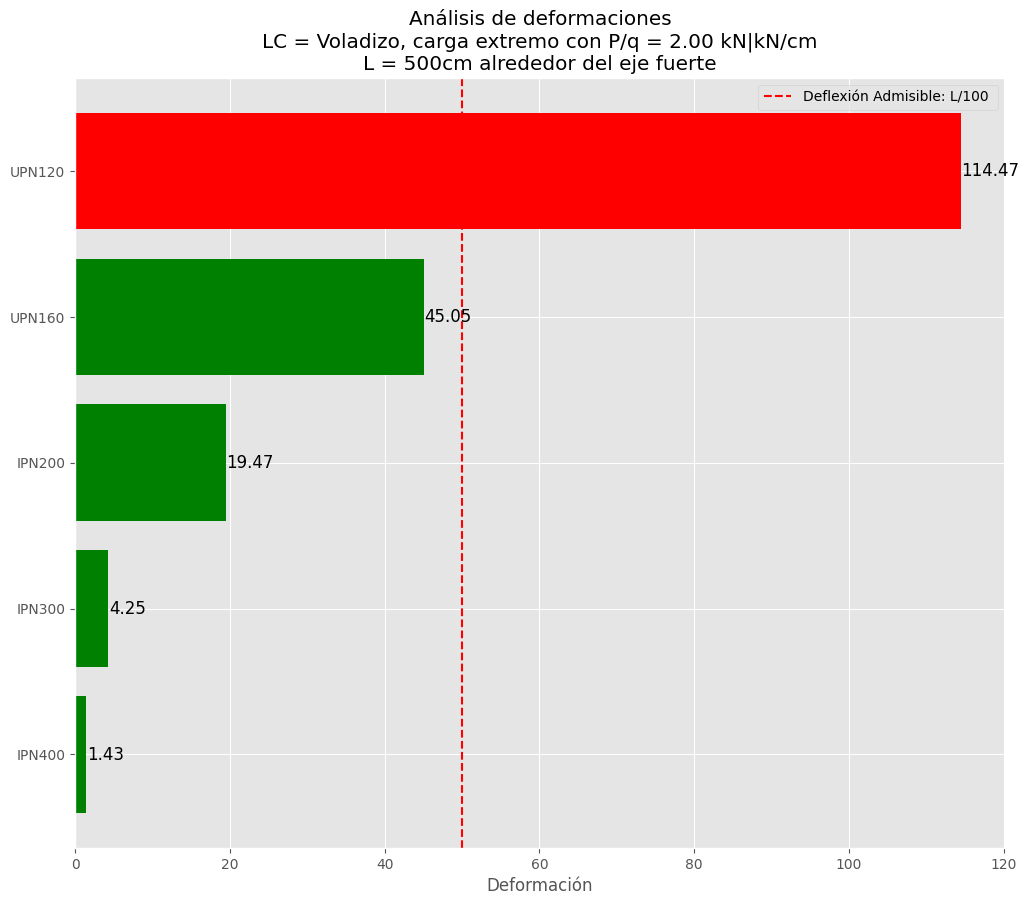

In [28]:
familia_perfiles.deformacion(ejemplo_perfiles,
                             caso = 'Voladizo, carga extremo',
                             carga = 2,
                             largo = 500,
                             tolerancia = 100,
                             eje = 'fuerte')

In [24]:
perfil = dobleT('IPE','200')

In [27]:
perfil.deformacion_tipica(
                             caso = 'Voladizo, carga extremo',
                             carga = 2,
                             largo = 500,
                             tolerancia = 100,
                             eje = 'fuerte')

            Deflexión para LC y perfil dado: 21.48 mm
            Deflexión admisible: 50.00 mm
            Ratio para tolerancia dada: 42.96 %
            


(None, 21.477663230240548)